In [1]:
import random
random.seed(1) 
import numpy as np
np.random.seed(1)

In [2]:
import warnings
warnings.filterwarnings('ignore')
import scanpy as sc
import dynamo as dyn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
from dynamo.tools.utils import nearest_neighbors
from dynamo.plot.utils import map2color

|-----> setting visualization default mode in dynamo. Your customized matplotlib settings might be overritten.


In [3]:
bm_norm = sc.read_h5ad("/home/wangzl/data/Nascent_RNA/bm_norm.h5ad")
bm_norm.obs['time'] = 2
tkey = 'time'


In [4]:
def remove_low_expr(adata,gene_set,n=750):
    gene_list = gene_set.iloc[:,0].to_list()
    
    new_df = adata.to_df(layer='new')
    filtered_set = new_df.mean(axis=0)[gene_list].sort_values().index[n:].to_list()
    return filtered_set

In [5]:
mono_geneset = pd.read_csv('./result1/bm_monocyte_use_for_pca.csv',index_col=0)
mac_geneset = pd.read_csv('./result1/bm_macrophage_use_for_pca.csv',index_col=0)
neu_geneset = pd.read_csv('./result1/bm_neutrophil_use_for_pca.csv',index_col=0)

In [6]:
bm_monocyte = bm_norm[(bm_norm.obs['cell_type']=='Monocyte') & (bm_norm.obs['seurat_clusters']==3)]
mono_geneset = remove_low_expr(bm_monocyte,mono_geneset)

In [7]:
dyn.pp.recipe_monocle(bm_monocyte,
                      normalized=True,
                      experiment_type="one-shot",
                      genes_to_use=mono_geneset,
                      n_top_genes=len(mono_geneset),
                      maintain_n_top_genes=True
                      )

|-----> recipe_monocle_keep_filtered_cells_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_filtered_cells_key=True
|-----> recipe_monocle_keep_filtered_genes_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_filtered_genes_key=True
|-----> recipe_monocle_keep_raw_layers_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_raw_layers_key=True
|-----> apply Monocole recipe to adata...
|-----> <insert> pp to uns in AnnData Object.
|-----------> <insert> has_splicing to uns['pp'] in AnnData Object.
|-----------> <insert> has_labling to uns['pp'] in AnnData Object.
|-----------> <insert> splicing_labeling to uns['pp'] in AnnData Object.
|-----------> <insert> has_protein to uns['pp'] in AnnData Object.
|-----> ensure all cell and variable names unique.
|-----> ensure all data in different layers in csr sparse matrix format.
|-----> ensure all labeling data properly collapased
True
|-----? 
When analyzing labelin

In [8]:
dyn.tl.dynamics(bm_monocyte)

|-----> dynamics_del_2nd_moments_key is None. Using default value from DynamoAdataConfig: dynamics_del_2nd_moments_key=False
|-----------> removing existing M layers:[]...
|-----------> making adata smooth...
|-----> calculating first/second moments...
|-----> [moments calculation] in progress: 100.0000%
|-----> [moments calculation] finished [46.2186s]
|-----? Your adata only has labeling data, but `NTR_vel` is set to be `False`. Dynamo will reset it to `True` to enable this analysis.


estimating gamma: 100%|██████████| 1250/1250 [01:58<00:00, 10.52it/s]


AnnData object with n_obs × n_vars = 2826 × 15666
    obs: 'UMAP_1', 'UMAP_2', 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'percent.mt', 'percent.ribo', 'percent.dissociation', 'S.Score', 'G2M.Score', 'Phase', 'CC.Difference', 'originalexp_snn_res.2', 'seurat_clusters', 'cell_type', 'time', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'new_Size_Factor', 'initial_new_cell_size', 'total_Size_Factor', 'initial_total_cell_size', 'Size_Factor', 'initial_cell_size', 'ntr', 'cell_cycle_phase'
    var: 'nCells', 'nCounts', 'pass_basic_filter', 'use_for_pca', 'frac', 'ntr', 'alpha', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'beta_k', 'gamma_k', 'use_for_dynamics'
    uns: 'pp', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'cell_phase_genes', 'dynamics'
    obsm: 'X_pca', 'X', 'cell_cycle_scores'
    varm: '

In [9]:
dyn.tl.reduceDimension(bm_monocyte)

|-----> retrive data for non-linear dimension reduction...
|-----> perform umap...
|-----> [dimension_reduction projection] in progress: 100.0000%
|-----> [dimension_reduction projection] finished [66.7117s]


In [10]:
dyn.tl.cell_velocities(
    bm_monocyte,
#    enforce=True,
#    X=bm_monocyte.layers["M_t"],
#    V=bm_monocyte.layers["velocity_alpha_minus_gamma_s"],
#    method="cosine"

)
color_list = {'n00h':'#EE2A2A',
              'n02h':'#CD2AEE',
              'n06h':'#442AEE',
              'n12h':'#2AEE99',
              'n24h':'#C6EE2A',
              'n48h':'#06202E',
              'n72h':'#55B2E1'}

|-----> incomplete neighbor graph info detected: connectivities and distances do not exist in adata.obsp, indices not in adata.uns.neighbors.
|-----> Neighbor graph is broken, recomputing....
|-----> Start computing neighbor graph...
|-----------> X_data is None, fetching or recomputing...
|-----> fetching X data from layer:None, basis:pca
|-----> method arg is None, choosing methods automatically...
|-----------> method ball_tree selected
|-----> <insert> connectivities to obsp in AnnData Object.
|-----> <insert> distances to obsp in AnnData Object.
|-----> <insert> neighbors to uns in AnnData Object.
|-----> <insert> neighbors.indices to uns in AnnData Object.
|-----> <insert> neighbors.params to uns in AnnData Object.
|-----> 0 genes are removed because of nan velocity values.
|-----> [calculating transition matrix via pearson kernel with sqrt transform.] in progress: 100.0000%
|-----> [calculating transition matrix via pearson kernel with sqrt transform.] finished [4.9411s]
|----->

|-----------> plotting with basis key=X_umap
|-----------> skip filtering orig.ident by stack threshold when stacking color because it is not a numeric type


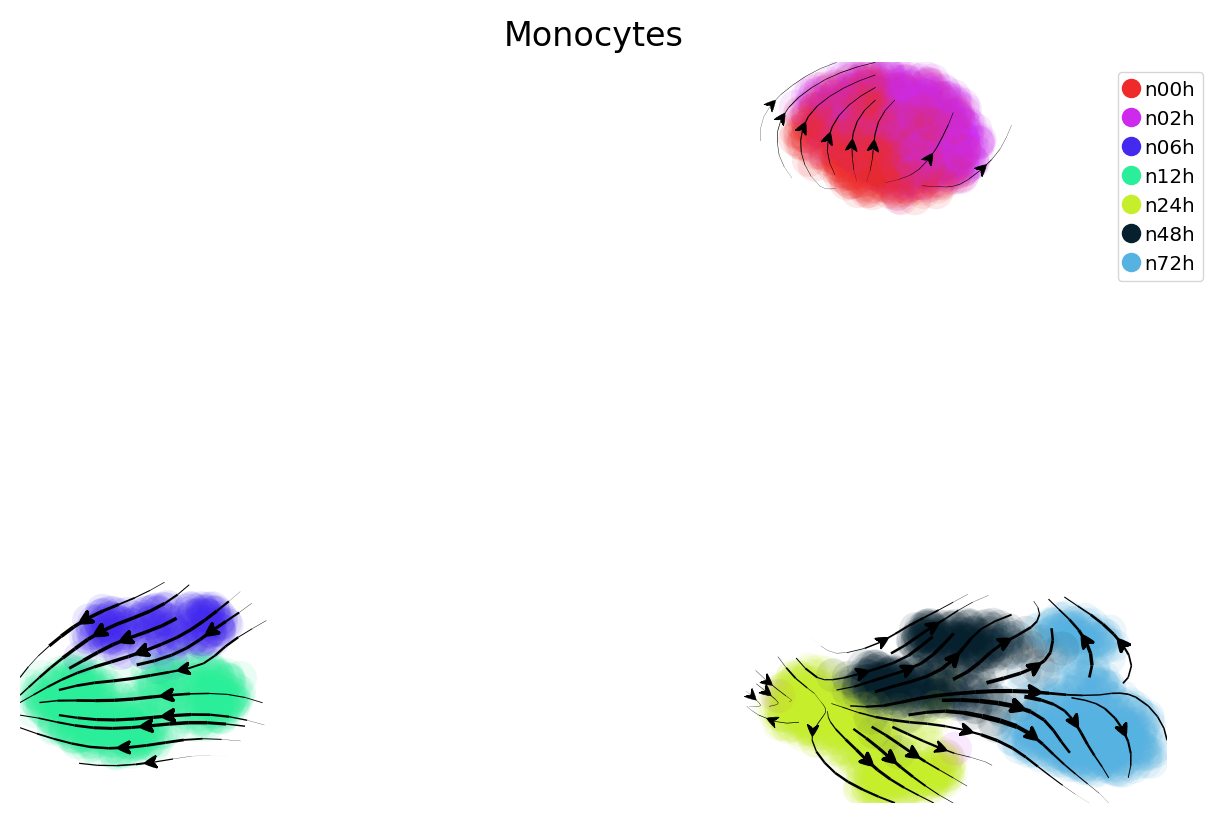

In [11]:
fig1, f1_axes = plt.subplots(ncols=1, nrows=1, constrained_layout=True, figsize=(6, 4))
f1_axes = dyn.pl.streamline_plot(
    bm_monocyte,
    color=["orig.ident"],
    basis="umap",
    color_key=color_list,
    show_legend=True,
    pointsize=0.5,
    inverse=True,
    ax=f1_axes,
    save_show_or_return='return'
)
plt.title("Monocytes")
plt.show()

|-----> retrive data for non-linear dimension reduction...
|-----? adata already have basis pca. dimension reduction pca will be skipped! 
set enforce=True to re-performing dimension reduction.
|-----> Start computing neighbor graph...
|-----------> X_data is None, fetching or recomputing...
|-----> fetching X data from layer:None, basis:pca
|-----> method arg is None, choosing methods automatically...
|-----------> method ball_tree selected
|-----> <insert> connectivities to obsp in AnnData Object.
|-----> <insert> distances to obsp in AnnData Object.
|-----> <insert> neighbors to uns in AnnData Object.
|-----> <insert> neighbors.indices to uns in AnnData Object.
|-----> <insert> neighbors.params to uns in AnnData Object.
|-----> [dimension_reduction projection] in progress: 100.0000%
|-----> [dimension_reduction projection] finished [0.7925s]
|-----> 0 genes are removed because of nan velocity values.
Using existing pearson_transition_matrix found in .obsp.
|-----> [projecting veloci

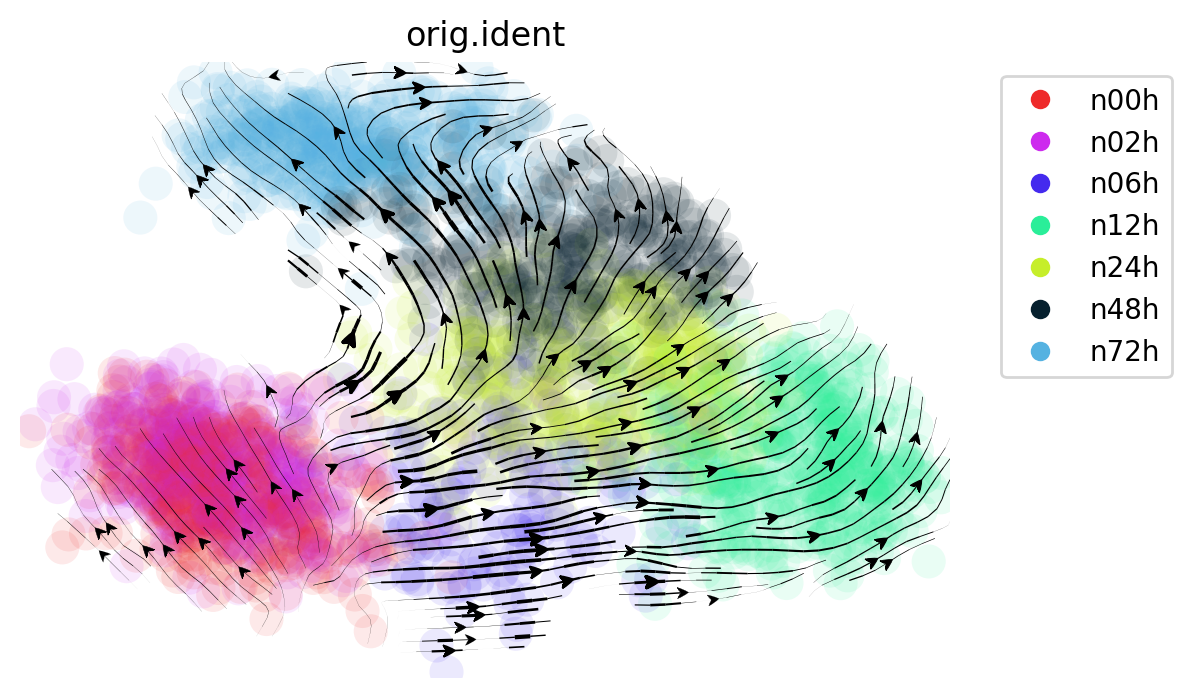

In [12]:
dyn.pl.streamline_plot(
    bm_monocyte,
    color=["orig.ident"],
    basis="pca",
    color_key=color_list,
    show_legend=True,
    pointsize=0.5,
    inverse=True
)